# HMC: higher-order integrators

Florent Leclercq,<br/>
Imperial Centre for Inference and Cosmology, Imperial College London,<br/>
florent.leclercq@polytechnique.org

In [1]:
import numpy as np
from scipy.integrate import quad
from scipy.stats import norm, uniform
from math import floor, ceil, log2
from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter
from cycler import cycler
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
np.random.seed(123456)
%matplotlib inline
plt.rcParams.update({'lines.linewidth': 2, 'font.size':12})

## The target pdf

In [2]:
def target_joint(x,y):
    return x*x * np.exp(-x*y*y -y*y +2.*y -4.*x)
def target_marginal_x(x):
    return x*x/np.sqrt(x+1) * np.exp(-4.*x -1./(x+1.))
def target_marginal_y(y):
    return np.exp(-y*y+2.*y) / (y*y+4.)**3
def psi(x,y,Ncalls=-1):
    # psi(x,y)=-ln(target_joint(x,y))
    ans = np.where(x>1e-10, -2.*np.log(np.fabs(x)) +x*y*y +y*y -2.*y +4.*x, +1e8)
    if Ncalls>=0:
        return ans, Ncalls+1
    else:
        return ans
def dpsi_dx(x,y,Ncalls=-1):
    ans = np.where(x>1e-10, -2./x +y*y* +4., +1e8)
    if Ncalls>=0:
        return ans, Ncalls+1
    else:
        return ans
def dpsi_dy(x,y,Ncalls=-1):
    ans = 2.*x*y +2.*y -2.
    if Ncalls>=0:
        return ans, Ncalls+1
    else:
        return ans

In [3]:
# Normalization of the marginals
Nx=quad(target_marginal_x,0.0001,100.)[0]
Ny=quad(target_marginal_y,-100.,100.)[0]

In [4]:
xmin=0.01
xmax=2.
ymin=-1.
ymax=2.5
x=np.linspace(xmin,xmax,1000)
y=np.linspace(ymin,ymax,1000)
X,Y=np.meshgrid(x,y)
Z=target_joint(X,Y)
Psi=psi(X,Y)
dPsi_dx=dpsi_dx(X,Y)
dPsi_dy=dpsi_dy(X,Y)

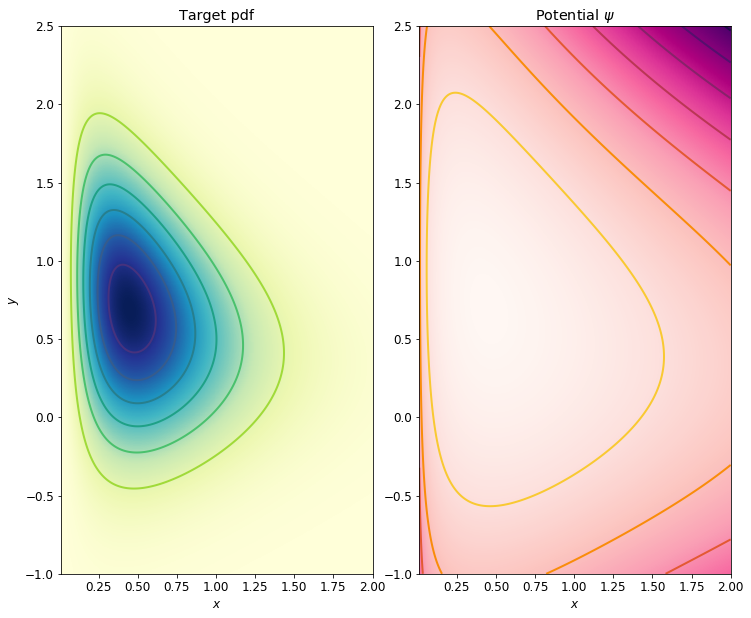

In [5]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))
f.subplots_adjust(wspace=0.15)
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel("$x$")
ax1.set_ylabel("$y$")
ax1.imshow(Z,extent=(xmin,xmax,ymin,ymax),origin='lower',cmap='YlGnBu')
ax1.contour(X,Y,Z,extent=(xmin,xmax,ymin,ymax),origin='lower',cmap='viridis_r')
ax1.set_title("Target pdf")
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin,ymax)
ax2.set_xlabel("$x$")
ax2.imshow(Psi,extent=(xmin,xmax,ymin,ymax),origin='lower',cmap='RdPu')
ax2.contour(X,Y,Psi,extent=(xmin,xmax,ymin,ymax),origin='lower',cmap='inferno_r')
ax2.set_title("Potential $\psi$")
plt.show()

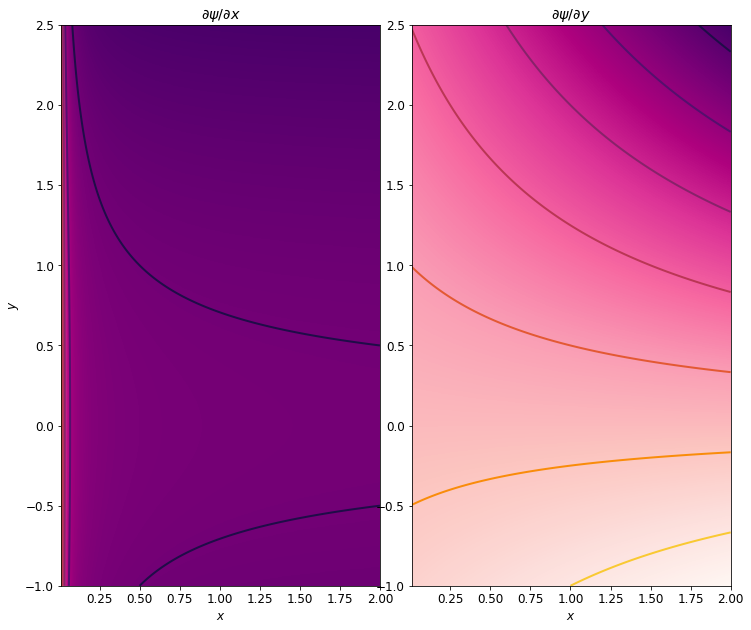

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))
f.subplots_adjust(wspace=0.1)
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel("$x$")
ax1.set_ylabel("$y$")
ax1.imshow(dPsi_dx,extent=(xmin,xmax,ymin,ymax),origin='lower',cmap='RdPu')
ax1.contour(X,Y,dPsi_dx,extent=(xmin,xmax,ymin,ymax),origin='lower',cmap='inferno_r')
ax1.set_title("$\partial \psi / \partial x$")
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin,ymax)
ax2.set_xlabel("$x$")
ax2.imshow(dPsi_dy,extent=(xmin,xmax,ymin,ymax),origin='lower',cmap='RdPu')
ax2.contour(X,Y,dPsi_dy,extent=(xmin,xmax,ymin,ymax),origin='lower',cmap='inferno_r')
ax2.set_title("$\partial \psi / \partial y$")
plt.show()

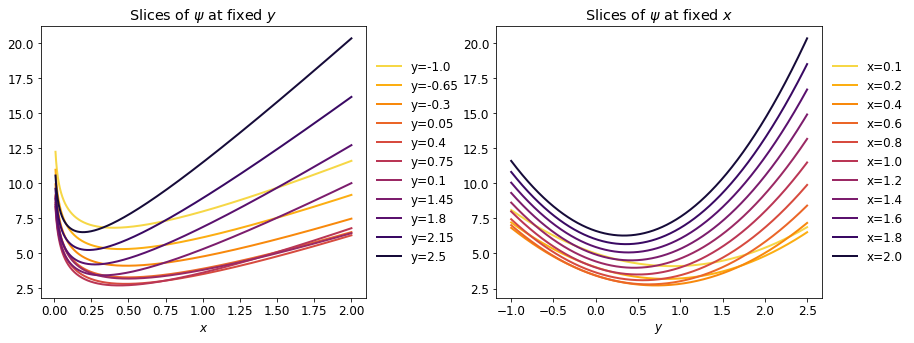

In [7]:
# Plot slices of psi
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
f.subplots_adjust(wspace=0.4)
ax1.set_prop_cycle(cycler('color', [plt.cm.inferno_r(i) for i in np.linspace(0.1,0.9,11)]))
ax2.set_prop_cycle(cycler('color', [plt.cm.inferno_r(i) for i in np.linspace(0.1,0.9,11)]))
for this_y in np.array((-1.0,-0.65,-0.30,0.05,0.40,0.75,0.10,1.45,1.80,2.15,2.5)):
    ax1.plot(x,psi(x,this_y),label='y='+str(this_y))
ax1.set_xlabel("$x$")
ax1.set_title("Slices of $\psi$ at fixed $y$")
ax1.legend(frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))
for this_x in np.array((0.1,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0)):
    ax2.plot(y,psi(this_x,y),label='x='+str(this_x))
ax2.set_xlabel("$y$")
ax2.set_title("Slices of $\psi$ at fixed $x$")
ax2.legend(frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

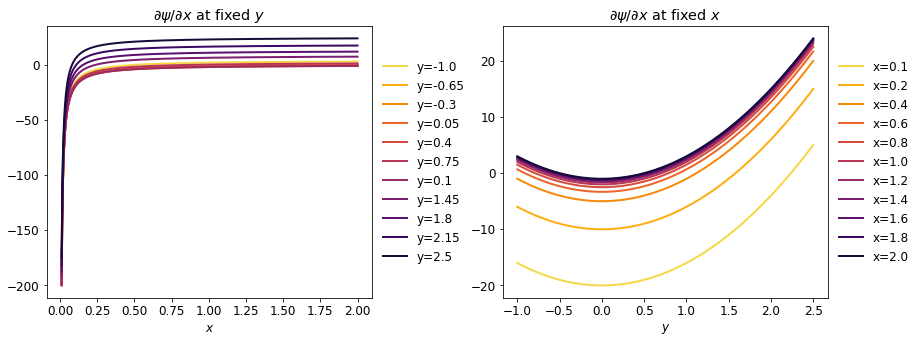

In [8]:
# Plot slices of dpsi/dx
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
f.subplots_adjust(wspace=0.4)
ax1.set_prop_cycle(cycler('color', [plt.cm.inferno_r(i) for i in np.linspace(0.1,0.9,11)]))
ax2.set_prop_cycle(cycler('color', [plt.cm.inferno_r(i) for i in np.linspace(0.1,0.9,11)]))
for this_y in np.array((-1.0,-0.65,-0.30,0.05,0.40,0.75,0.10,1.45,1.80,2.15,2.5)):
    ax1.plot(x,dpsi_dx(x,this_y),label='y='+str(this_y))
ax1.set_xlabel("$x$")
ax1.set_title("$\partial \psi /\partial x$ at fixed $y$")
ax1.legend(frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))
for this_x in np.array((0.1,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0)):
    ax2.plot(y,dpsi_dx(this_x,y),label='x='+str(this_x))
ax2.set_xlabel("$y$")
ax2.set_title("$\partial \psi /\partial x$ at fixed $x$")
ax2.legend(frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

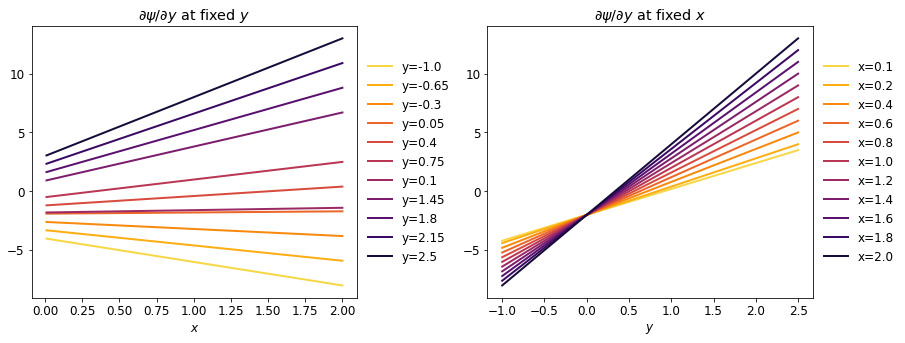

In [9]:
# Plot slices of dpsi/dy
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
f.subplots_adjust(wspace=0.4)
ax1.set_prop_cycle(cycler('color', [plt.cm.inferno_r(i) for i in np.linspace(0.1,0.9,11)]))
ax2.set_prop_cycle(cycler('color', [plt.cm.inferno_r(i) for i in np.linspace(0.1,0.9,11)]))
for this_y in np.array((-1.0,-0.65,-0.30,0.05,0.40,0.75,0.10,1.45,1.80,2.15,2.5)):
    ax1.plot(x,dpsi_dy(x,this_y),label='y='+str(this_y))
ax1.set_xlabel("$x$")
ax1.set_title("$\partial \psi /\partial y$ at fixed $y$")
ax1.legend(frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))
for this_x in np.array((0.1,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0)):
    ax2.plot(y,dpsi_dy(this_x,y),label='x='+str(this_x))
ax2.set_xlabel("$y$")
ax2.set_title("$\partial \psi /\partial y$ at fixed $x$")
ax2.legend(frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

## Auto-correlation diagnostics

In [10]:
# Python code from the emcee tutorials, https://emcee.readthedocs.io/en/stable/tutorials/autocorr/

def next_power_of_2(n):
    return 1 if n == 0 else 2**ceil(log2(n))

# 1D autocorrelation function
def autocorr_func_1d(x, norm=True):
    x = np.atleast_1d(x)
    n = next_power_of_2(len(x))

    # Compute the FFT and then (from that) the auto-correlation function
    f = np.fft.fft(x - np.mean(x), n=2 * n)
    acf = np.fft.ifft(f * np.conjugate(f))[: len(x)].real
    acf /= 4 * n

    # Optionally normalize
    if norm:
        acf /= acf[0]

    return acf

# Automated windowing procedure following Sokal (1989)
def auto_window(taus, c):
    m = np.arange(len(taus)) < c * taus
    if np.any(m):
        return np.argmin(m)
    return len(taus) - 1

# Following the suggestion from Goodman & Weare (2010)
def autocorr_gw2010(y, c=5.0):
    f = autocorr_func_1d(y)
    taus = 2.0 * np.cumsum(f) - 1.0
    window = auto_window(taus, c)
    return taus[window]

def N_eff(x):
    acf=autocorr_gw2010(x)
    return len(x)/acf

## HMC with second-order integrator

In [11]:
def leapfrog_move(dpsi_dx,Ncalls_dpsi_dx_current,dpsi_dy,Ncalls_dpsi_dy_current,InvMassMatrix,dpsidx,dpsidy,x,y,p_x,p_y,epsilon):
    # Kick: make half step in p_x, p_y
    p_x -= epsilon*dpsidx/2.0
    p_y -= epsilon*dpsidy/2.0
    # compute velocities
    p = np.array((p_x,p_y))
    v_x,v_y = InvMassMatrix.dot(p)
    # Drift: make full step in (x,y)
    new_x = x+epsilon*v_x
    new_y = y+epsilon*v_y
    # compute new gradient
    dpsidx, Ncalls_dpsi_dx_current = dpsi_dx(new_x,new_y,Ncalls=Ncalls_dpsi_dx_current)
    dpsidy, Ncalls_dpsi_dy_current = dpsi_dy(new_x,new_y,Ncalls=Ncalls_dpsi_dy_current)
    # Kick: make half step in p_x, p_y
    p_x -= epsilon*dpsidx/2.0
    p_y -= epsilon*dpsidy/2.0
    
    return dpsidx,dpsidy,new_x,new_y,p_x,p_y,Ncalls_dpsi_dx_current,Ncalls_dpsi_dy_current

def Hamiltonian_leapfrog_sampler(psi,dpsi_dx,dpsi_dy,MassMatrix,Neval,stepsize,Ntries,x_start,y_start):
    InvMassMatrix=np.linalg.inv(MassMatrix)
    Naccepted=0
    x=x_start
    y=y_start
    samples_x=[x]
    samples_y=[y]
    Ncalls_psi=[0]
    Ncalls_psi_current=0
    Ncalls_dpsi_dx=[0]
    Ncalls_dpsi_dx_current=0
    Ncalls_dpsi_dy=[0]
    Ncalls_dpsi_dy_current=0
    Neff_x=[0]
    Neff_y=[0]
    for _ in range(Ntries):
        # compute potential energy and gradient
        old_x = x
        old_y = y
        old_psi, Ncalls_psi_current = psi(old_x,old_y,Ncalls=Ncalls_psi_current)
        dpsidx, Ncalls_dpsi_dx_current = dpsi_dx(old_x,old_y,Ncalls=Ncalls_dpsi_dx_current)
        dpsidy, Ncalls_dpsi_dy_current = dpsi_dy(old_x,old_y,Ncalls=Ncalls_dpsi_dy_current)
        
        # randomly draw momenta
        p_x = norm(0.,1.).rvs()
        p_y = norm(0.,1.).rvs()
        p = np.array((p_x,p_y))
        
        # compute kinetic energy
        old_K = p.T.dot(InvMassMatrix).dot(p)/2.
        
        # compute Hamiltonian
        old_H = old_K + old_psi
        
        # do leapfrog integration steps
        Nsteps = 1+floor(uniform.rvs()*Neval)
        for step in range(Nsteps):
            # draw stepsize
            epsilon = uniform.rvs()*stepsize
            
            # call leapfrog move
            dpsidx,dpsidy,x,y,p_x,p_y,Ncalls_dpsi_dx_current,Ncalls_dpsi_dy_current = leapfrog_move(dpsi_dx,Ncalls_dpsi_dx_current,dpsi_dy,Ncalls_dpsi_dy_current,InvMassMatrix,dpsidx,dpsidy,x,y,p_x,p_y,epsilon)
        
        # compute new energy and Hamiltonian
        new_x=x; new_y=y
        new_psi = psi(new_x,new_y)
        p = np.array((p_x,p_y))
        new_K = p.T.dot(InvMassMatrix).dot(p)/2.
        new_H = new_K + new_psi
        dH = new_H - old_H
        
        # accept/reject new candidate x,y using the standard Metropolis-Hastings rule
        if(x<0.):
            accept=False
        else:
            if(dH<0.0):
                accept=True
            else:
                a = np.exp(-dH)
                u = np.random.uniform()
                if(u < a):
                    accept=True
                else:
                    accept=False
                    
        if(accept):
            x=new_x
            y=new_y
            Naccepted+=1
        else:
            x=old_x
            y=old_y
        samples_x.append(x)
        samples_y.append(y)
        Ncalls_psi.append(Ncalls_psi_current)
        Ncalls_dpsi_dx.append(Ncalls_dpsi_dx_current)
        Ncalls_dpsi_dy.append(Ncalls_dpsi_dy_current)
        Neff_x.append(N_eff(samples_x))
        Neff_y.append(N_eff(samples_y))

    return Naccepted, np.array(samples_x), np.array(samples_y), np.array(Ncalls_psi), np.array(Ncalls_dpsi_dx), np.array(Ncalls_dpsi_dy), np.array(Neff_x), np.array(Neff_y)

In [12]:
Ntries=3000
x_start=1.8
y_start=-0.8
MassMatrix=np.array([[1., 0.], [0., 1.]])
Neval=20
stepsize=0.1
Naccepted,samples_x,samples_y,Ncalls_psi,Ncalls_dpsi_dx,Ncalls_dpsi_dy,Neff_x,Neff_y=Hamiltonian_leapfrog_sampler(psi,dpsi_dx,dpsi_dy,MassMatrix,Neval,stepsize,Ntries,x_start,y_start)

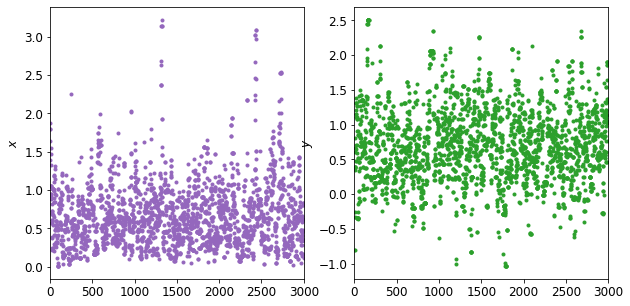

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
f.subplots_adjust(wspace=0.2)
ax1.set_xlim(0,Ntries)
ax1.set_ylabel("$x$")
ax1.scatter(np.arange(Ntries+1),samples_x,color='C4',marker='.')
ax2.set_xlim(0,Ntries)
ax2.set_ylabel("$y$")
ax2.scatter(np.arange(Ntries+1),samples_y,color='C2',marker='.')
plt.show()

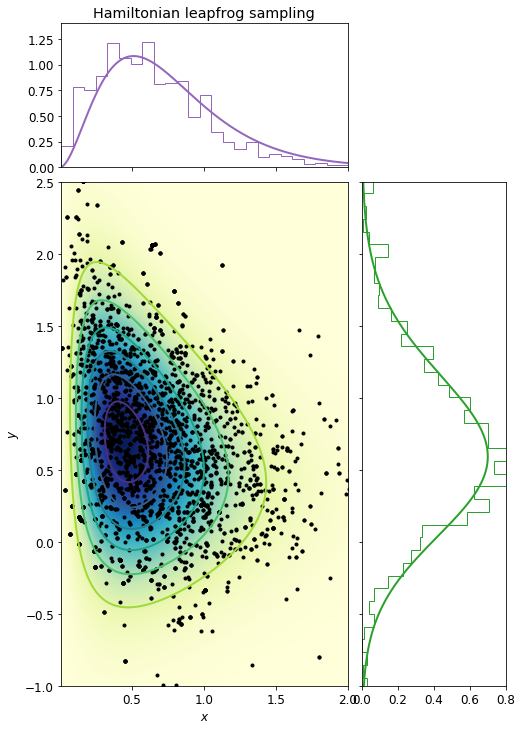

In [14]:
nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0., xmax-xmin
bottom, height = 0., ymax-ymin
left_h = left + width + 0.1
bottom_h = bottom + height + 0.1

rect_pdf = [left, bottom, width, height]
rect_pdfx = [left, bottom_h, width, 1.]
rect_pdfy = [left_h, bottom, 1., height]

# start with a rectangular Figure
plt.figure(1, figsize=(2, 2))

ax = plt.axes(rect_pdf)
axpdfx = plt.axes(rect_pdfx)
axpdfy = plt.axes(rect_pdfy)

# no labels
axpdfx.xaxis.set_major_formatter(nullfmt)
axpdfy.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.imshow(Z,extent=(xmin,xmax,ymin,ymax),origin='lower',cmap='YlGnBu')
ax.contour(X,Y,Z,extent=(xmin,xmax,ymin,ymax),origin='lower',cmap='viridis_r')
ax.scatter(samples_x,samples_y,marker='.',color='black')

# the histograms:
axpdfx.set_xlim(xmin,xmax)
axpdfx.set_ylim([0,1.4])
axpdfx.plot(x,target_marginal_x(x)/Nx,color='C4')
axpdfx.hist(samples_x,40,density=True,histtype='step',color='C4')

axpdfy.set_xlim([0,0.8])
axpdfy.set_ylim(ymin,ymax)
axpdfy.plot(target_marginal_y(y)/Ny,y,color='C2')
axpdfy.hist(samples_y,40,density=True,histtype='step',color='C2',orientation='horizontal')

axpdfx.set_title("Hamiltonian leapfrog sampling")
plt.show()

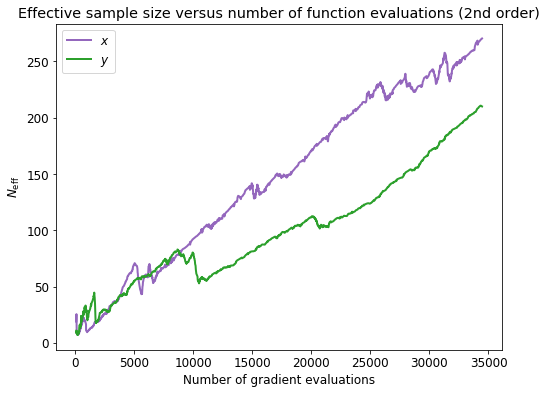

In [15]:
plt.figure(figsize=(8,6))
plt.plot(Ncalls_dpsi_dx[10:],Neff_x[10:],color='C4',label="$x$")
plt.plot(Ncalls_dpsi_dy[10:],Neff_y[10:],color='C2',label="$y$")
plt.xlabel("Number of gradient evaluations")
plt.ylabel("$N_\mathrm{eff}$")
plt.title("Effective sample size versus number of function evaluations (2nd order)")
plt.legend(loc="best")

## HMC with fourth-order integrator

In [16]:
def fourth_order_move(dpsi_dx,Ncalls_dpsi_dx_current,dpsi_dy,Ncalls_dpsi_dy_current,InvMassMatrix,dpsidx,dpsidy,x,y,p_x,p_y,epsilon,i,s):
    # i forward steps
    for _ in range(i):
        dpsidx,dpsidy,x,y,p_x,p_y,Ncalls_dpsi_dx_current,Ncalls_dpsi_dy_current = leapfrog_move(dpsi_dx,Ncalls_dpsi_dx_current,dpsi_dy,Ncalls_dpsi_dy_current,InvMassMatrix,dpsidx,dpsidy,x,y,p_x,p_y,epsilon)
    
    # one backward step
    dpsidx,dpsidy,x,y,p_x,p_y,Ncalls_dpsi_dx_current,Ncalls_dpsi_dy_current = leapfrog_move(dpsi_dx,Ncalls_dpsi_dx_current,dpsi_dy,Ncalls_dpsi_dy_current,InvMassMatrix,dpsidx,dpsidy,x,y,p_x,p_y,-s*epsilon)
    
    # i forward steps
    for _ in range(i):
        dpsidx,dpsidy,x,y,p_x,p_y,Ncalls_dpsi_dx_current,Ncalls_dpsi_dy_current = leapfrog_move(dpsi_dx,Ncalls_dpsi_dx_current,dpsi_dy,Ncalls_dpsi_dy_current,InvMassMatrix,dpsidx,dpsidy,x,y,p_x,p_y,epsilon)
        
    return dpsidx,dpsidy,x,y,p_x,p_y,Ncalls_dpsi_dx_current,Ncalls_dpsi_dy_current


def Hamiltonian_fourthorder_sampler(psi,dpsi_dx,dpsi_dy,MassMatrix,stepsize,i,s,Ntries,x_start,y_start):
    InvMassMatrix=np.linalg.inv(MassMatrix)
    Naccepted=0
    x=x_start
    y=y_start
    samples_x=[x]
    samples_y=[y]
    Ncalls_psi=[0]
    Ncalls_psi_current=0
    Ncalls_dpsi_dx=[0]
    Ncalls_dpsi_dx_current=0
    Ncalls_dpsi_dy=[0]
    Ncalls_dpsi_dy_current=0
    Neff_x=[0]
    Neff_y=[0]
    for _ in range(Ntries):
        # compute potential energy and gradient
        old_x = x
        old_y = y
        old_psi, Ncalls_psi_current = psi(old_x,old_y,Ncalls=Ncalls_psi_current)
        dpsidx, Ncalls_dpsi_dx_current = dpsi_dx(old_x,old_y,Ncalls=Ncalls_dpsi_dx_current)
        dpsidy, Ncalls_dpsi_dy_current = dpsi_dy(old_x,old_y,Ncalls=Ncalls_dpsi_dy_current)
        
        # randomly draw momenta
        p_x = norm(0.,1.).rvs()
        p_y = norm(0.,1.).rvs()
        p = np.array((p_x,p_y))
        
        # compute kinetic energy
        old_K = p.T.dot(InvMassMatrix).dot(p)/2.
        
        # compute Hamiltonian
        old_H = old_K + old_psi
        
        # do one fourth-order integration step
        # draw stepsize
        epsilon = uniform.rvs()*stepsize

        # call leapfrog move
        dpsidx,dpsidy,x,y,p_x,p_y,Ncalls_dpsi_dx_current,Ncalls_dpsi_dy_current = fourth_order_move(dpsi_dx,Ncalls_dpsi_dx_current,dpsi_dy,Ncalls_dpsi_dy_current,InvMassMatrix,dpsidx,dpsidy,x,y,p_x,p_y,epsilon,i,s)
        
        # compute new energy and Hamiltonian
        new_x=x; new_y=y
        new_psi = psi(new_x,new_y)
        p = np.array((p_x,p_y))
        new_K = p.T.dot(InvMassMatrix).dot(p)/2.
        new_H = new_K + new_psi
        dH = new_H - old_H
        
        # accept/reject new candidate x,y using the standard Metropolis-Hastings rule
        if(x<0.):
            accept=False
        else:
            if(dH<0.0):
                accept=True
            else:
                a = np.exp(-dH)
                u = np.random.uniform()
                if(u < a):
                    accept=True
                else:
                    accept=False
                    
        if(accept):
            x=new_x
            y=new_y
            Naccepted+=1
        else:
            x=old_x
            y=old_y
        samples_x.append(x)
        samples_y.append(y)
        Ncalls_psi.append(Ncalls_psi_current)
        Ncalls_dpsi_dx.append(Ncalls_dpsi_dx_current)
        Ncalls_dpsi_dy.append(Ncalls_dpsi_dy_current)
        Neff_x.append(N_eff(samples_x))
        Neff_y.append(N_eff(samples_y))

    return Naccepted, np.array(samples_x), np.array(samples_y), np.array(Ncalls_psi), np.array(Ncalls_dpsi_dx), np.array(Ncalls_dpsi_dy), np.array(Neff_x), np.array(Neff_y)

In [17]:
Ntries=3000
x_start=1.8
y_start=-0.8
MassMatrix=np.array([[1., 0.], [0., 1.]])
i=3
s=(2*i)**(1/3.)
stepsize=0.1
Naccepted,samples_x,samples_y,Ncalls_psi,Ncalls_dpsi_dx,Ncalls_dpsi_dy,Neff_x,Neff_y=Hamiltonian_fourthorder_sampler(psi,dpsi_dx,dpsi_dy,MassMatrix,stepsize,i,s,Ntries,x_start,y_start)

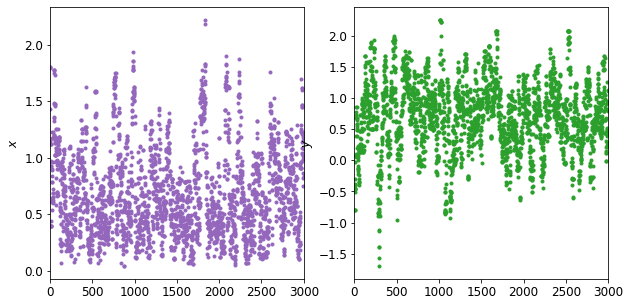

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
f.subplots_adjust(wspace=0.2)
ax1.set_xlim(0,Ntries)
ax1.set_ylabel("$x$")
ax1.scatter(np.arange(Ntries+1),samples_x,color='C4',marker='.')
ax2.set_xlim(0,Ntries)
ax2.set_ylabel("$y$")
ax2.scatter(np.arange(Ntries+1),samples_y,color='C2',marker='.')
plt.show()

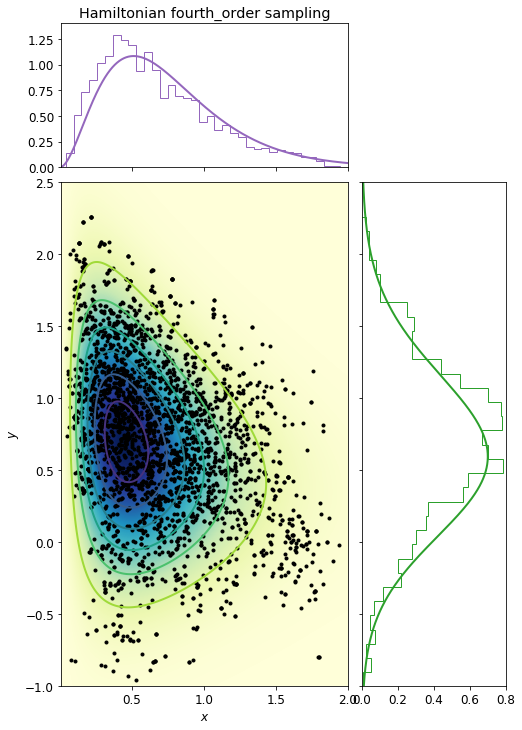

In [19]:
nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0., xmax-xmin
bottom, height = 0., ymax-ymin
left_h = left + width + 0.1
bottom_h = bottom + height + 0.1

rect_pdf = [left, bottom, width, height]
rect_pdfx = [left, bottom_h, width, 1.]
rect_pdfy = [left_h, bottom, 1., height]

# start with a rectangular Figure
plt.figure(1, figsize=(2, 2))

ax = plt.axes(rect_pdf)
axpdfx = plt.axes(rect_pdfx)
axpdfy = plt.axes(rect_pdfy)

# no labels
axpdfx.xaxis.set_major_formatter(nullfmt)
axpdfy.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.imshow(Z,extent=(xmin,xmax,ymin,ymax),origin='lower',cmap='YlGnBu')
ax.contour(X,Y,Z,extent=(xmin,xmax,ymin,ymax),origin='lower',cmap='viridis_r')
ax.scatter(samples_x,samples_y,marker='.',color='black')

# the histograms:
axpdfx.set_xlim(xmin,xmax)
axpdfx.set_ylim([0,1.4])
axpdfx.plot(x,target_marginal_x(x)/Nx,color='C4')
axpdfx.hist(samples_x,40,density=True,histtype='step',color='C4')

axpdfy.set_xlim([0,0.8])
axpdfy.set_ylim(ymin,ymax)
axpdfy.plot(target_marginal_y(y)/Ny,y,color='C2')
axpdfy.hist(samples_y,40,density=True,histtype='step',color='C2',orientation='horizontal')

axpdfx.set_title("Hamiltonian fourth_order sampling")
plt.show()

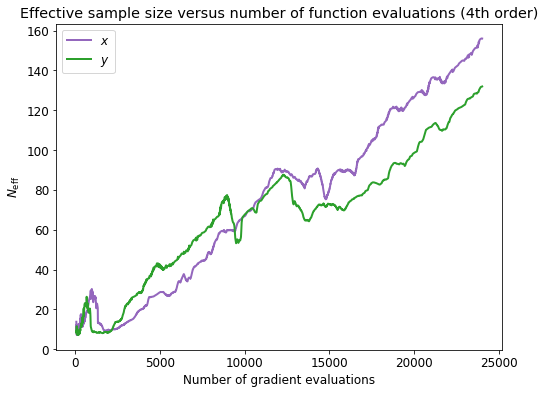

In [20]:
plt.figure(figsize=(8,6))
plt.plot(Ncalls_dpsi_dx[10:],Neff_x[10:],color='C4',label="$x$")
plt.plot(Ncalls_dpsi_dy[10:],Neff_y[10:],color='C2',label="$y$")
plt.xlabel("Number of gradient evaluations")
plt.ylabel("$N_\mathrm{eff}$")
plt.title("Effective sample size versus number of function evaluations (4th order)")
plt.legend(loc="best")

## Comparison of sampler efficiencies

In [21]:
Ntries=3000
x_start=1.8
y_start=-0.8
MassMatrix=np.array([[1., 0.], [0., 1.]])
stepsize=0.1

In [22]:
Neval=5
Naccepted_A1,samples_x_A1,samples_y_A1,Ncalls_psi_A1,Ncalls_dpsi_dx_A1,Ncalls_dpsi_dy_A1,Neff_x_A1,Neff_y_A1=Hamiltonian_leapfrog_sampler(psi,dpsi_dx,dpsi_dy,MassMatrix,Neval,stepsize,Ntries,x_start,y_start)
Neval=20
Naccepted_A2,samples_x_A2,samples_y_A2,Ncalls_psi_A2,Ncalls_dpsi_dx_A2,Ncalls_dpsi_dy_A2,Neff_x_A2,Neff_y_A2=Hamiltonian_leapfrog_sampler(psi,dpsi_dx,dpsi_dy,MassMatrix,Neval,stepsize,Ntries,x_start,y_start)
Neval=50
Naccepted_A3,samples_x_A3,samples_y_A3,Ncalls_psi_A3,Ncalls_dpsi_dx_A3,Ncalls_dpsi_dy_A3,Neff_x_A3,Neff_y_A3=Hamiltonian_leapfrog_sampler(psi,dpsi_dx,dpsi_dy,MassMatrix,Neval,stepsize,Ntries,x_start,y_start)

In [23]:
i=1
s=(2*i)**(1/3.)
Naccepted_B1,samples_x_B1,samples_y_B1,Ncalls_psi_B1,Ncalls_dpsi_dx_B1,Ncalls_dpsi_dy_B1,Neff_x_B1,Neff_y_B1=Hamiltonian_fourthorder_sampler(psi,dpsi_dx,dpsi_dy,MassMatrix,stepsize,i,s,Ntries,x_start,y_start)
i=2
s=(2*i)**(1/3.)
Naccepted_B2,samples_x_B2,samples_y_B2,Ncalls_psi_B2,Ncalls_dpsi_dx_B2,Ncalls_dpsi_dy_B2,Neff_x_B2,Neff_y_B2=Hamiltonian_fourthorder_sampler(psi,dpsi_dx,dpsi_dy,MassMatrix,stepsize,i,s,Ntries,x_start,y_start)
i=3
s=(2*i)**(1/3.)
Naccepted_B3,samples_x_B3,samples_y_B3,Ncalls_psi_B3,Ncalls_dpsi_dx_B3,Ncalls_dpsi_dy_B3,Neff_x_B3,Neff_y_B3=Hamiltonian_fourthorder_sampler(psi,dpsi_dx,dpsi_dy,MassMatrix,stepsize,i,s,Ntries,x_start,y_start)
i=4
s=(2*i)**(1/3.)
Naccepted_B4,samples_x_B4,samples_y_B4,Ncalls_psi_B4,Ncalls_dpsi_dx_B4,Ncalls_dpsi_dy_B4,Neff_x_B4,Neff_y_B4=Hamiltonian_fourthorder_sampler(psi,dpsi_dx,dpsi_dy,MassMatrix,stepsize,i,s,Ntries,x_start,y_start)

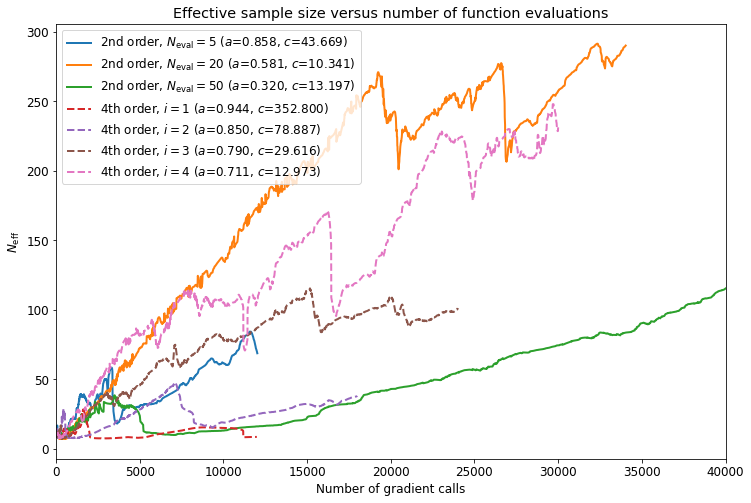

In [24]:
plt.figure(figsize=(12,8))
plt.xlim([0,40000])
plt.plot(Ncalls_dpsi_dx_A1[10:],Neff_x_A1[10:],linestyle="-",label="2nd order, $N_\mathrm{{eval}}=5$ ($a$={:.3f}, $c$={:.3f})".format(Naccepted_A1/Ntries, autocorr_gw2010(samples_x_A1)))
plt.plot(Ncalls_dpsi_dx_A2[10:],Neff_x_A2[10:],linestyle="-",label="2nd order, $N_\mathrm{{eval}}=20$ ($a$={:.3f}, $c$={:.3f})".format(Naccepted_A2/Ntries, autocorr_gw2010(samples_x_A2)))
plt.plot(Ncalls_dpsi_dx_A3[10:],Neff_x_A3[10:],linestyle="-",label="2nd order, $N_\mathrm{{eval}}=50$ ($a$={:.3f}, $c$={:.3f})".format(Naccepted_A3/Ntries, autocorr_gw2010(samples_x_A3)))
plt.plot(Ncalls_dpsi_dx_B1[50:],Neff_x_B1[50:],linestyle="--",label="4th order, $i=1$ ($a$={:.3f}, $c$={:.3f})".format(Naccepted_B1/Ntries, autocorr_gw2010(samples_x_B1)))
plt.plot(Ncalls_dpsi_dx_B2[10:],Neff_x_B2[10:],linestyle="--",label="4th order, $i=2$ ($a$={:.3f}, $c$={:.3f})".format(Naccepted_B2/Ntries, autocorr_gw2010(samples_x_B2)))
plt.plot(Ncalls_dpsi_dx_B3[10:],Neff_x_B3[10:],linestyle="--",label="4th order, $i=3$ ($a$={:.3f}, $c$={:.3f})".format(Naccepted_B3/Ntries, autocorr_gw2010(samples_x_B3)))
plt.plot(Ncalls_dpsi_dx_B4[10:],Neff_x_B4[10:],linestyle="--",label="4th order, $i=4$ ($a$={:.3f}, $c$={:.3f})".format(Naccepted_B4/Ntries, autocorr_gw2010(samples_x_B4)))
plt.xlabel("Number of gradient calls")
plt.ylabel("$N_\mathrm{eff}$")
plt.title("Effective sample size versus number of function evaluations")
plt.legend(loc="best")

In [25]:
stepsize=0.185
Neval=9
Naccepted_C1,samples_x_C1,samples_y_C1,Ncalls_psi_C1,Ncalls_dpsi_dx_C1,Ncalls_dpsi_dy_C1,Neff_x_C1,Neff_y_C1=Hamiltonian_leapfrog_sampler(psi,dpsi_dx,dpsi_dy,MassMatrix,Neval,stepsize,Ntries,x_start,y_start)

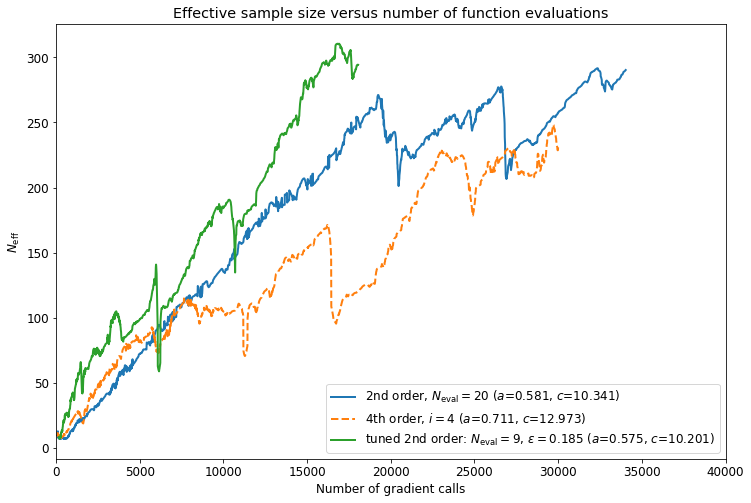

In [26]:
plt.figure(figsize=(12,8))
plt.xlim([0,40000])
plt.plot(Ncalls_dpsi_dx_A2[10:],Neff_x_A2[10:],linestyle="-",label="2nd order, $N_\mathrm{{eval}}=20$ ($a$={:.3f}, $c$={:.3f})".format(Naccepted_A2/Ntries, autocorr_gw2010(samples_x_A2)))
plt.plot(Ncalls_dpsi_dx_B4[10:],Neff_x_B4[10:],linestyle="--",label="4th order, $i=4$ ($a$={:.3f}, $c$={:.3f})".format(Naccepted_B4/Ntries, autocorr_gw2010(samples_x_B4)))
plt.plot(Ncalls_dpsi_dx_C1[30:],Neff_x_C1[30:],linestyle="-",label="tuned 2nd order: $N_\mathrm{{eval}}=9$, $\\varepsilon=0.185$ ($a$={:.3f}, $c$={:.3f})".format(Naccepted_C1/Ntries, autocorr_gw2010(samples_x_C1)))
plt.xlabel("Number of gradient calls")
plt.ylabel("$N_\mathrm{eff}$")
plt.title("Effective sample size versus number of function evaluations")
plt.legend(loc="best")